<a href="https://colab.research.google.com/github/kumar306Ankit/Cluster-spam-comments-/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset contains videos from 4 different YouTubers and all the comments made on those
videos. The primary objective of this dataset is to cluster the comments to identify a cluster that
contains all the spam comments and fix the issue once and for all.

[Youtube_Comment_Classification](https://www.kaggle.com/datasets/japkeeratsingh/youtube-videos-and-the-comments)

### Import Dataset

In [1]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Projects/Project 1/YT_Videos_Comments.csv")
l = ['Video Title','Video Description']
for i in l:
  data = data.drop(i, axis=1)
data

<ipython-input-1-054ad1ab6dc8>:2: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Projects/Project 1/YT_Videos_Comments.csv")


,User,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Cleo Abram,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,Cleo Abram,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,Cleo Abram,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,Cleo Abram,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,Cleo Abram,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z
...,...,...,...,...,...,...,...
861957,Physics Girl,xyXpQxz7BOs,"hey girl,make more vdos and make it lengthy .....","hey girl,make more vdos and make it lengthy .....",Omkar Bhambure,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z
861958,Physics Girl,xyXpQxz7BOs,Third,Third,Izzo Mapping,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z
861959,Physics Girl,xyXpQxz7BOs,third,third,Indecisive,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z
861960,Physics Girl,xyXpQxz7BOs,Second,Second,Nathan,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z


### Preprocess


> Data Preparation Filter dataset for specific video,Remove irrelevant columns,Clean text data


---



In [2]:
!pip install pandas nltk scikit-learn
import pandas as pd
import re
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer


video_id = 'Cleo Abram'
video_data = data[data['User'] == video_id]
video_data = video_data[['Comment (Actual)', 'Comment Author','Comment Time','Video ID']]

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    stopwords = nltk.corpus.stopwords.words('english') # Remove stopwords (optional)
    text = ' '.join([word for word in text.split() if word not in stopwords])
    return text
video_data['cleaned_comment'] = video_data['Comment (Actual)'].apply(clean_text)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Duplicate Counts

In [3]:
video_data['is_duplicate'] = video_data['cleaned_comment'].duplicated(keep=False) # Identify duplicate comments
duplicate_counts = video_data.groupby('Comment Author')['is_duplicate'].sum().reset_index() # Group dataset by user information and count duplicate comments
duplicate_counts.columns = ['Comment Author', 'Duplicate Count']
video_data = video_data.dropna(subset=['Comment Author', 'Comment Time']) # Drop rows with missing values in 'Comment Author' or 'Comment Time' columns
video_data['comment_length'] = video_data['cleaned_comment'].apply(len) # Calculate comment length
video_data['Comment Time'] = pd.to_datetime(video_data['Comment Time']) # Time Interval Between Comments
video_data.sort_values(['Comment Time'])
video_data

<ipython-input-3-f3b81acff8e3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_data['comment_length'] = video_data['cleaned_comment'].apply(len) # Calculate comment length
<ipython-input-3-f3b81acff8e3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  video_data['Comment Time'] = pd.to_datetime(video_data['Comment Time']) # Time Interval Between Comments


,Comment (Actual),Comment Author,Comment Time,Video ID,cleaned_comment,is_duplicate,comment_length
0,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,2023-03-11 07:39:33+00:00,YXd4z3gWyVE,zombie spider bomb damn lab late,False,32
1,"This is way less cool than it seems, spiders a...",CMZ neu,2023-03-11 05:26:10+00:00,YXd4z3gWyVE,way less cool seems spiders actually muscles e...,False,210
2,Spiders see this and this is why they made the...,Kiana Marrie,2023-03-11 04:02:27+00:00,YXd4z3gWyVE,spiders see made terrifying go poking panic bu...,False,50
3,you looks pretty 😍,Noob,2023-03-11 02:50:50+00:00,YXd4z3gWyVE,looks pretty,False,12
4,I can hear the hairs standing up on my wife’s ...,chancellor9000,2023-03-11 02:46:02+00:00,YXd4z3gWyVE,hear hairs standing wifes arms mile away,False,40
...,...,...,...,...,...,...,...
28814,The Internet Cables made her Leave Vox!!,Caleb Brown,2022-01-10 14:11:11+00:00,54IteWmegk0,internet cables made leave vox,False,30
28815,I always Love your content!! Keep up the Great...,Caleb Brown,2022-01-10 14:10:48+00:00,54IteWmegk0,always love content keep great work cant wait ...,False,54
28816,I'm so so looking forward to this!,Radon,2022-01-10 14:09:31+00:00,54IteWmegk0,im looking forward,False,18
28817,Let's go,suraj kumar,2022-01-10 14:07:24+00:00,54IteWmegk0,lets go,True,7


In [4]:
num_videos_commented = video_data.groupby('Comment Author')['Video ID'].nunique().reset_index() # Number of Different Videos Commented On
num_videos_commented.columns = ['Comment Author', 'Num Videos Commented']
duplicate_counts = duplicate_counts.merge(num_videos_commented) # Merge the features with duplicate_counts DataFrame
duplicate_counts['comment_length'] = video_data['comment_length']
duplicate_counts

,Comment Author,Duplicate Count,Num Videos Commented,comment_length
0,A Good Day To Dye,0,2,32.0
1,Deep M,0,1,210.0
2,Tasmanian Sass,0,4,50.0
3,!?,0,1,12.0
4,!Alexwingo!,0,1,40.0
...,...,...,...,...
23478,💙killua zoldyck💙,0,1,23.0
23479,💙snow fox💙,0,1,31.0
23480,🦉Ronin47🌌,0,1,32.0
23481,🧷🦇Carl Rencer,0,1,82.0


In [5]:
duplicate_counts['Num Videos Commented'].value_counts()

1     20838
2      1770
3       463
4       204
5        89
6        38
7        32
8        12
9        10
10        7
11        6
13        3
16        2
24        2
15        2
12        2
14        2
19        1
Name: Num Videos Commented, dtype: int64

In [6]:
duplicate_counts['Duplicate Count'].value_counts()

0    22091
1     1300
2       69
3       12
4        7
5        2
9        1
7        1
Name: Duplicate Count, dtype: int64

In [7]:
duplicate_counts['comment_length'].value_counts()

27.0      373
28.0      284
21.0      276
15.0      273
25.0      269
         ... 
498.0       1
696.0       1
704.0       1
3730.0      1
1301.0      1
Name: comment_length, Length: 893, dtype: int64

In [8]:
duplicate_counts

,Comment Author,Duplicate Count,Num Videos Commented,comment_length
0,A Good Day To Dye,0,2,32.0
1,Deep M,0,1,210.0
2,Tasmanian Sass,0,4,50.0
3,!?,0,1,12.0
4,!Alexwingo!,0,1,40.0
...,...,...,...,...
23478,💙killua zoldyck💙,0,1,23.0
23479,💙snow fox💙,0,1,31.0
23480,🦉Ronin47🌌,0,1,32.0
23481,🧷🦇Carl Rencer,0,1,82.0


### K-mean Clusttering



> Select relevant features



In [9]:
selected_features = duplicate_counts[['Comment Author', 'Duplicate Count', 'Num Videos Commented','comment_length']]

 

> Normalize the features if necessary



In [10]:
selected_features['Duplicate Count'] = selected_features['Duplicate Count'] / selected_features['Duplicate Count'].max()
selected_features['Num Videos Commented'] = selected_features['Num Videos Commented'] / selected_features['Num Videos Commented'].max()
selected_features['comment_length'] = selected_features['comment_length'] / selected_features['comment_length'].max()
selected_features.fillna(0, inplace=True) # Fill any missing values with 0 or other appropriate values
selected_features.drop('Comment Author', axis=1, inplace=True) # Optionally, you can drop the 'Comment Author' column if it's not needed for clustering

In [11]:
selected_features

,Duplicate Count,Num Videos Commented,comment_length
0,0.0,0.083333,0.008579
1,0.0,0.041667,0.056300
2,0.0,0.166667,0.013405
3,0.0,0.041667,0.003217
4,0.0,0.041667,0.010724
...,...,...,...
23478,0.0,0.041667,0.006166
23479,0.0,0.041667,0.008311
23480,0.0,0.041667,0.008579
23481,0.0,0.041667,0.021984




> Cluster Formation



In [12]:
selected_features['Duplicate Count'].value_counts()

0.000000    22091
0.111111     1300
0.222222       69
0.333333       12
0.444444        7
0.555556        2
1.000000        1
0.777778        1
Name: Duplicate Count, dtype: int64



> Optimal K



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

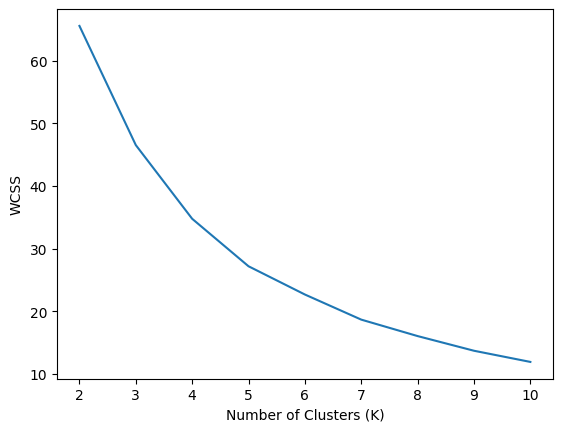

Cluster 2: [ 1503 21980]
Cluster 3: [ 1293 20824  1366]
Cluster 4: [ 1268 20144  1303   768]
Cluster 5: [18534  2630   757  1308   254]
Cluster 6: [17171   129  2539   254  2064  1326]
Cluster 7: [15791  1321   771  3367  2029    75   129]
Cluster 8: [15685    77   802  1300  3433   187  1967    32]
Cluster 9: [15853    75   748   350  1275  3317    34  1800    31]
Cluster 10: [14058  1373    46  1278   338    52  1822    31  4082   403]


<ipython-input-13-3d707377e3a5>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(cluster_counts))


In [13]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
cluster_counts = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(selected_features)
    wcss.append(kmeans.inertia_)
    cluster_labels = kmeans.labels_
    counts = np.bincount(cluster_labels)
    cluster_counts.append(counts)

plt.plot(range(2, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

colors = plt.cm.get_cmap('viridis', len(cluster_counts))

for i, counts in enumerate(cluster_counts):
    print(f"Cluster {i+2}: {counts}")


<ipython-input-14-13ccc516516b>:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(cluster_counts))


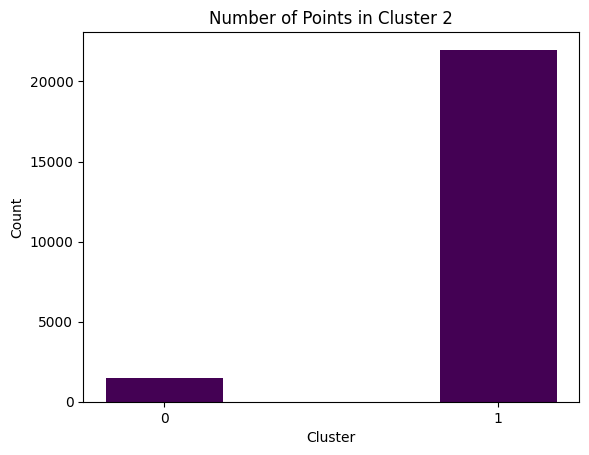

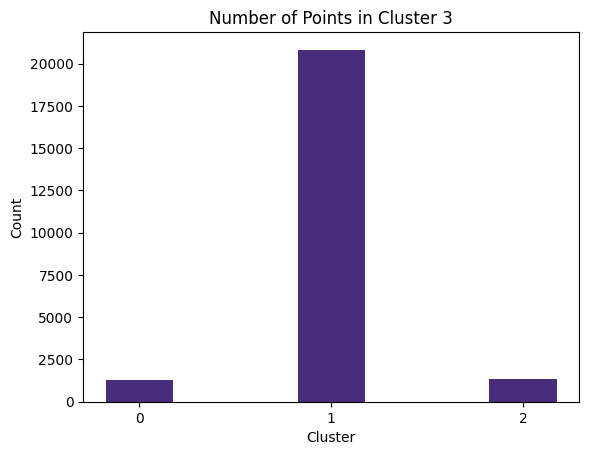

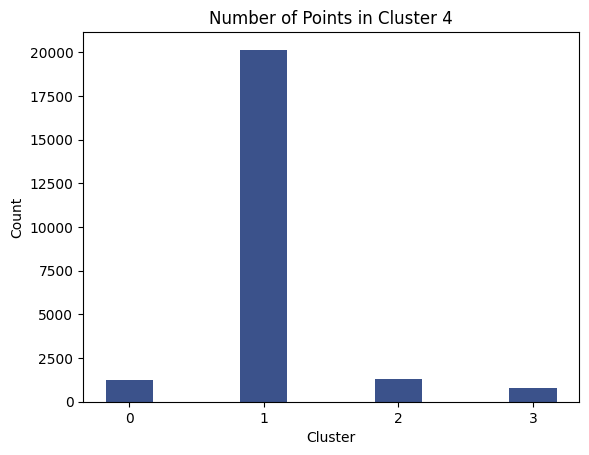

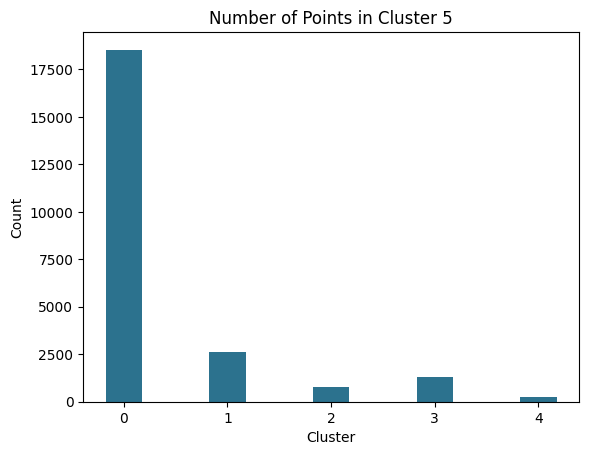

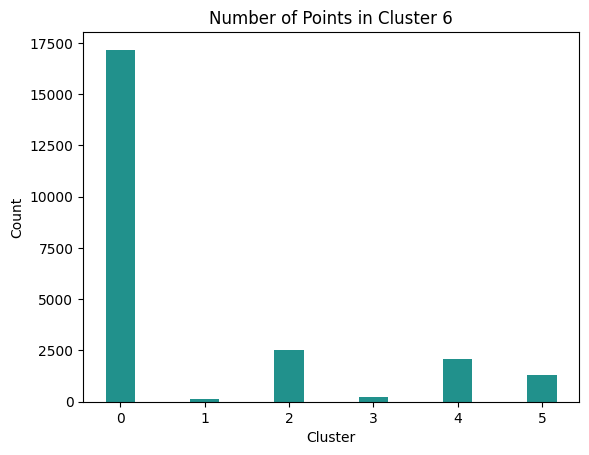

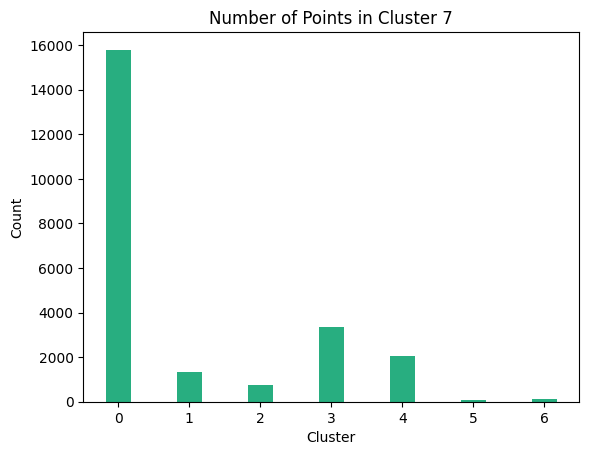

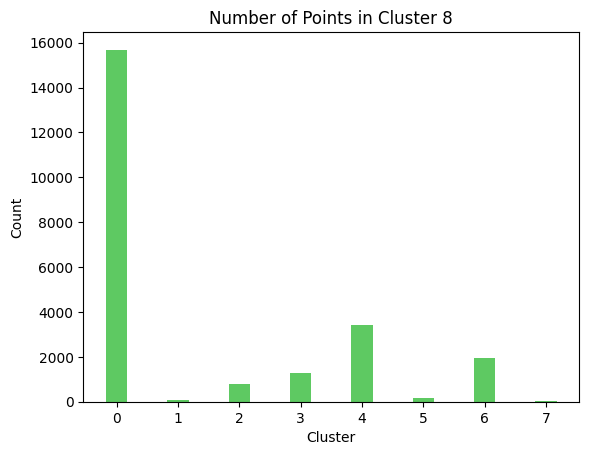

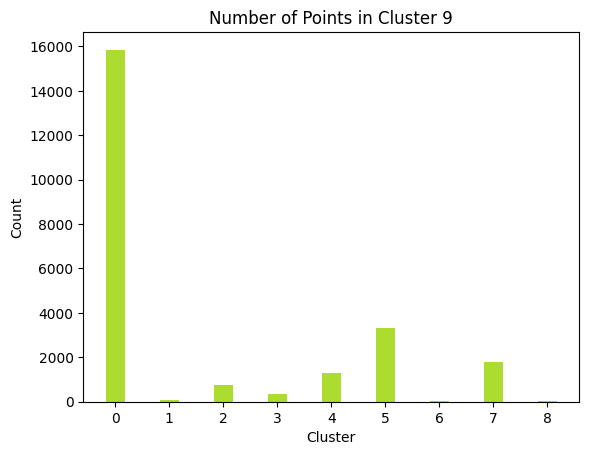

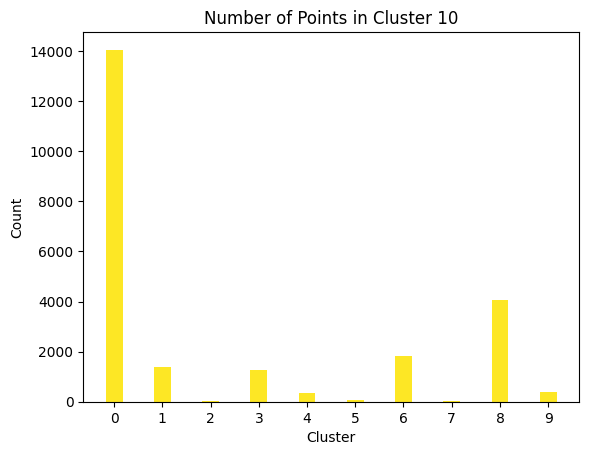

In [14]:
colors = plt.cm.get_cmap('viridis', len(cluster_counts))

for i, counts in enumerate(cluster_counts):
    fig, ax = plt.subplots()
    x = np.arange(len(counts))
    width = 0.35

    ax.bar(x, counts, width, color=colors(i))
    ax.set_xlabel('Cluster')
    ax.set_ylabel('Count')
    ax.set_title(f'Number of Points in Cluster {i+2}')
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    plt.show()

### Plots

> Fit K-means model with the chosen number of clusters

In [16]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import plotly.graph_objects as go

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
pca_features = pca.fit_transform(selected_features)

# Fit K-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(selected_features)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Create a 3D scatter plot
scatter = go.Scatter3d(
    x=pca_features[:, 0],
    y=pca_features[:, 1],
    z=pca_features[:, 2],
    mode='markers',
    marker=dict(
        color=cluster_labels,
        size=5,
        opacity=0.8,
        colorscale='Viridis'
    )
)

# Set up the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    ),
    uirevision=True,
    width=800,
    height=600,
)

# Create the figure
fig = go.Figure(data=[scatter], layout=layout)

# Display the plot
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


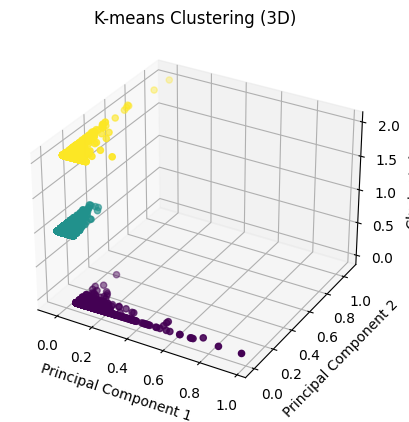

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2) # Apply PCA for dimensionality reduction
pca_features = pca.fit_transform(selected_features)
kmeans = KMeans(n_clusters=3, random_state=42) # Fit K-means clustering with 2 clusters
kmeans.fit(selected_features)
# Get cluster assignments for each data point
cluster_labels = kmeans.labels_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_features[:, 0], pca_features[:, 1], cluster_labels, c=cluster_labels, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Cluster Label')
ax.set_title('K-means Clustering (3D)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


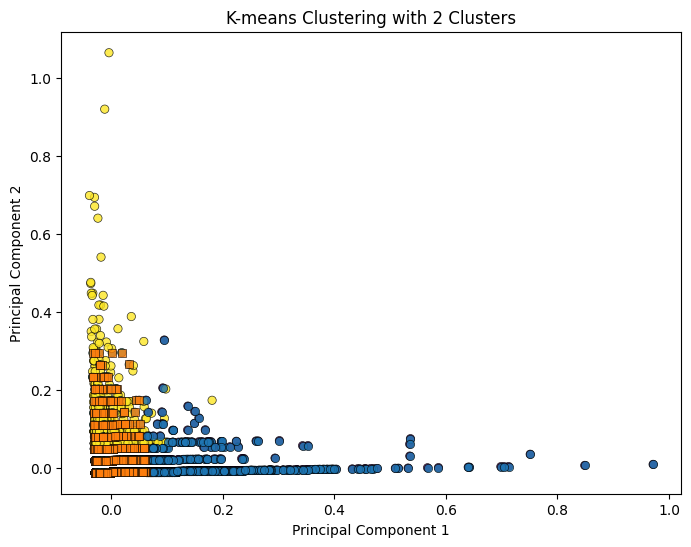

In [127]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)# Apply PCA for dimensionality reduction
pca_features = pca.fit_transform(selected_features)
kmeans = KMeans(n_clusters=3, random_state=42)# Fit K-means clustering with 2 clusters
kmeans.fit(selected_features)
cluster_labels = kmeans.labels_# Get cluster assignments for each data point
plt.figure(figsize=(8, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=cluster_labels, cmap='viridis',
            edgecolors='k', linewidths=0.5, alpha=0.8)
markers = ['o', 's']
for i, marker in enumerate(markers):
    cluster_points = pca_features[cluster_labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], marker=marker, edgecolors='k',
                linewidths=0.5, alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means Clustering with 2 Clusters')
plt.show()

### AgglomerativeClustering

In [17]:
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import plotly.graph_objects as go

# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)
pca_features = pca.fit_transform(selected_features)

# Apply Agglomerative Clustering with 3 clusters
agglomerative = AgglomerativeClustering(n_clusters=3)
cluster_labels = agglomerative.fit_predict(selected_features)

# Create a 3D scatter plot
scatter = go.Scatter3d(
    x=pca_features[:, 0],
    y=pca_features[:, 1],
    z=pca_features[:, 2],
    mode='markers',
    marker=dict(
        color=cluster_labels,
        size=5,
        opacity=0.8,
        colorscale='Viridis'
    )
)

# Set up the layout
layout = go.Layout(
    scene=dict(
        xaxis=dict(title='Principal Component 1'),
        yaxis=dict(title='Principal Component 2'),
        zaxis=dict(title='Principal Component 3')
    ),
    uirevision=True,
    width=800,
    height=600,
)

# Create the figure
fig = go.Figure(data=[scatter], layout=layout)

# Display the plot
fig.show()
